In [260]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
file_path = r"C:\Users\LAURA\Downloads\archive\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)

In [6]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [82]:
# Objective: Understand the relationship between product categories and their best-seller status.

# Crosstab Analysis:

# Create a crosstab between the product category and the isBestSeller status.

# Are there categories where being a best-seller is more prevalent?

In [139]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [113]:
crosstab["proportion_best_seller"]=crosstab[True]/crosstab[False]
crosstab.sort_values(by="proportion_best_seller", ascending=False)

isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.061723
Smart Home Security & Lighting,98,6,0.061224
Health & Personal Care,9017,552,0.061218
Mobile Phone Accessories,248,11,0.044355
Power & Hand Tools,8353,306,0.036634
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [ ]:
# Statistical Tests:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.

In [121]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36691.497100799854, 0.0)

In [ ]:
# 0 < pvalue, so we reject the null hypothesis. 
# This implies that there's a significant dependence between category and best-seller status in the dataset.

In [133]:
association(crosstab, method="cramer")

ValueError: `observed` must be an integer array.

<Axes: xlabel='category'>

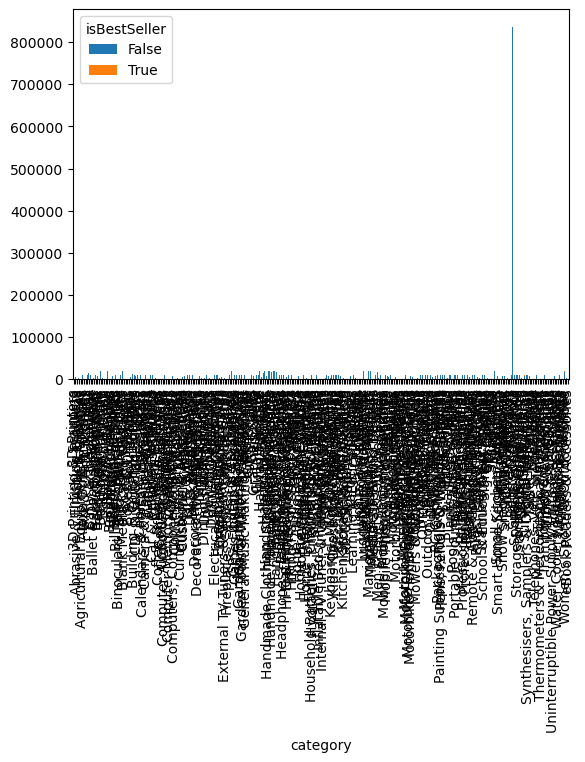

In [154]:
crosstab.plot.bar(stacked=True)

In [ ]:
Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

In [170]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [172]:
data_series = df['price']  
outliers = tukeys_test_outliers(data_series)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [174]:
df_2= df[df.index.isin(outliers.index)==False]
df_2

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


C:\Users\LAURA\AppData\Local\Temp\ipykernel_22256\2304529009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

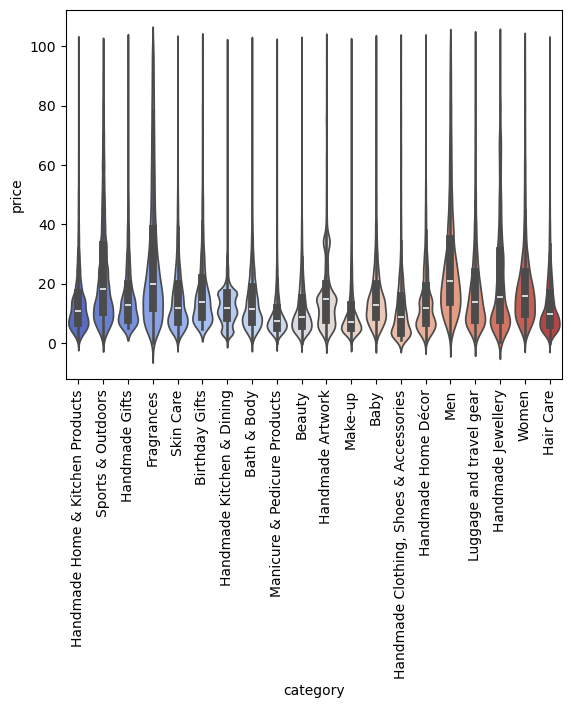

In [182]:
top_20_categories = df_2['category'].value_counts().head(20).index
df_top_20 = df_2[df_2['category'].isin(top_20_categories)]

sns.violinplot(data=df_top_20, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)

In [ ]:
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.

In [214]:
# Calcular el promedio de precios por categoría
avg_price_per_category = df_2.groupby('category')['price'].mean()

# Ordenar las categorías por la cantidad de productos y seleccionar las top 10
top_10_categories = df_2['category'].value_counts().head(10).index
top_10_avg_price = avg_price_per_category[top_10_categories]
top_10_avg_price

category
Sports & Outdoors                         25.172065
Beauty                                    12.523480
Bath & Body                               14.678683
Manicure & Pedicure Products              10.231825
Handmade Clothing, Shoes & Accessories    12.958639
Make-up                                   10.612918
Skin Care                                 15.654722
Hair Care                                 13.461408
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Name: price, dtype: float64

<Axes: xlabel='category'>

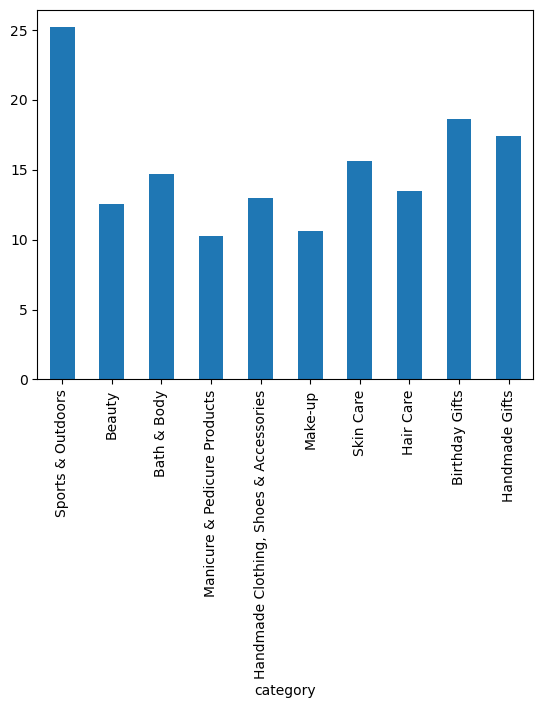

In [194]:
top_10_avg_price.plot.bar(x='category', y='price')

In [ ]:
# Box Plots:

# Visualize the distribution of product ratings based on their category using side-by-side box plots.
# Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

C:\Users\LAURA\AppData\Local\Temp\ipykernel_22256\117745605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10, palette='muted')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Fragrances'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

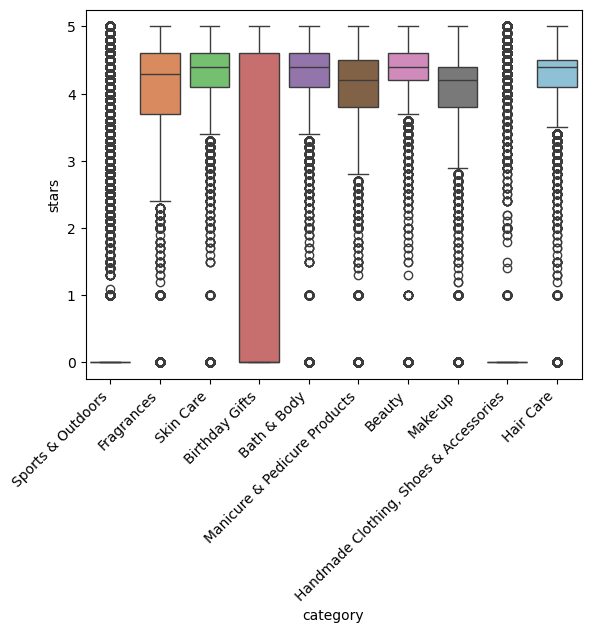

In [228]:
top_10_categories = df['category'].value_counts().head(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]
sns.boxplot(x='category', y='stars', data=df_top_10, palette='muted')
plt.xticks(rotation=45, ha='right')

In [240]:
product_media = df.groupby('category')['price'].mean().sort_values(ascending=False)
product_media

category
Laptops                  1087.987827
3D Printers              1018.036129
Desktop PCs               926.816064
Home Office Furniture     622.135898
Test & Measurement        559.382973
                            ...     
Bedding Accessories         8.835220
Adapters                    8.750197
Signs & Plaques             8.275136
Arts & Crafts               8.182523
Office Paper Products       7.047684
Name: price, Length: 296, dtype: float64

In [250]:
correlation_pearson = df_2['price'].corr(df_2['stars'], method = "pearson")
correlation_spearman = df_2['price'].corr(df_2['stars'], method = "spearman")
print(f"""Pearson's correlation: {correlation_pearson},
Spearman's correlation: {correlation_spearman}""")

Pearson's correlation: -0.07767299878178476,
Spearman's correlation: -0.06679697280756669


<Axes: xlabel='price', ylabel='stars'>

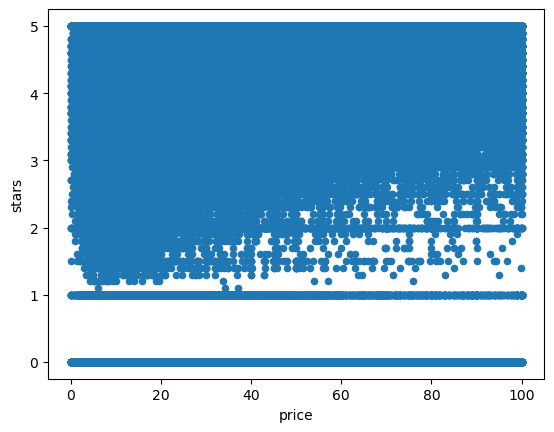

In [252]:
#- The Pearson correlation of -0.08 suggests a weak negative linear relationship between the price and rating.
#- The Spearman correlation of -0.07 indicates a weak negative monotonic relationship between the price and rating.
# 2. 
df_2.plot(kind="scatter", x="price", y="stars")

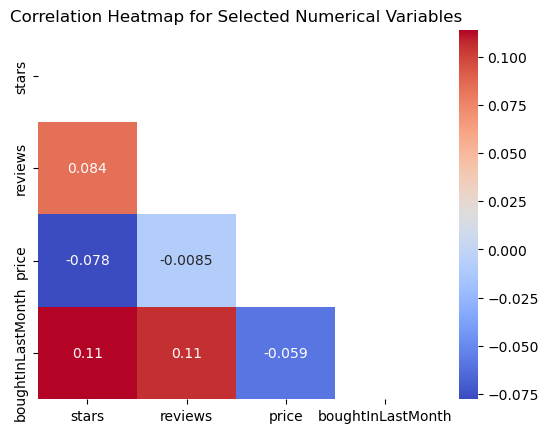

In [262]:
correlation_matrix = df_2.select_dtypes("number").drop(columns="uid").corr()
mask = np.triu(correlation_matrix)  # just to show half the matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask)
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

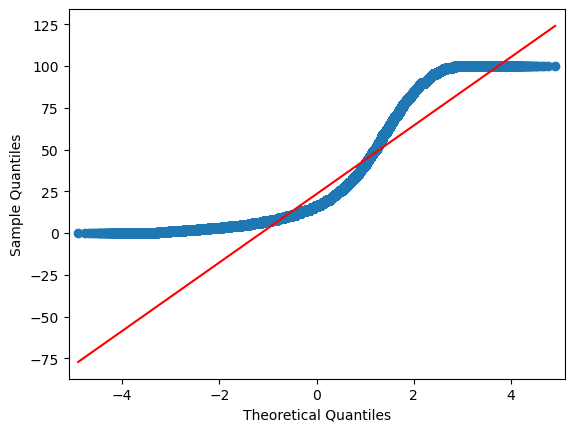

In [266]:
sm.qqplot(df_2['price'], line='s');